# Notebook d'analyse statistique

<table>
    <td><img src = "datadetective.png" width = "700px" ></td>
</table>

Dans ce notebook, nous verrons les différentes méthodes à utiliser pour extraire de l'information d'un dataset. Ce notebook se veut être un récapitulatif de toutes les techniques vue en cours. 
Un exemple d'utilisation de ce notebook peut être lors de la préparation d'un entretien technique pour un poste de data analyse ou encore lors de l'envoi du test technique comprenant une table à explorer.

L'idée ici, est de comprendre les différent outils individuelement. L'ordre chioisi est généralement celui utilisé mais vous pouvez bien évidement explorer le data set de la manière qui vous convient.

On retiendra le principe générale qui consiste à **extraire de l'information pertinente des données**

Le plan de ce notebook est le suivant:
    
1. Question à se poser sur le jeu de données (A priori)
2. Chargement de données
3. Comprendre les données à l'aide de l'analyse descriptive
4. Comprendre les données à l'aide de la visualisation
5. Recoder les données
6. Modélisation statistique

## I - Question à se poser sur le jeu de données (A priori)

De quelles données parles t-on?
* A quoi s'attend t-on coomme données ?
* A quel type de données ?
* Sur quel population ?
* Entre quelles dates ?
L'idée ici est de se construire une image des données et de ce que l'on pourrait trouver. 


#### Exemple de projet -  Titanic:

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/front_page.png" width = "400">

Les données des passagés du Titanic disponible sur le lien suivant:
https://www.kaggle.com/c/titanic

Les exemples de questions à se poser sont nombreux:

* Quelles sont les nationalités de passagés?
* Combien de classes sur le navire?
* D'où ont embarqué les passagés ?
* Les  et le capitaine ont t-ils couler avec le navire ?
* Quel est le taux de surive des passagés?

? Un exemple d'analyse:

* L'assertion "**Les femmes et les enfants d'abord**" est-elle vérifier par l'analyse des données ?

## II - Chargement de données

#### Jeu de données "Pima Indians" (Les indiens Pimas du Méxique)

On utilisera ici un jeu de données sur les patients diabétiques chez les indiens Pima.

https://fr.wikipedia.org/wiki/Pimas

<img src = "https://upload.wikimedia.org/wikipedia/commons/6/6f/Pima.jpg" width = "500">


#### a) Avec la librairie python standard

In [2]:
import csv
import numpy
filename = 'pima-indians-diabetes.data.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = numpy.array(x).astype('float')
data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [4]:
data.shape

(768, 9)

#### b) Chargement à l'aide de Numpy

In [7]:
from numpy import loadtxt
filename = 'pima-indians-diabetes.data.csv'
raw_data = open(filename, 'rt')
data = loadtxt(raw_data, delimiter=",")
data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [8]:
print(data.shape)

(768, 9)


#### c) Chargement à l'aide de Pandas

In [13]:
from urllib.request import urlopen# Load CSV using Pandas
from pandas import read_csv
filename = 'pima-indians-diabetes.data.csv' #### Nom du fichier 
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] ### Nom des colonnes
data = read_csv(filename, names=names) #### Chargement des fichiers
data ### Afficher le dataset

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
type(data) ### data Frame

pandas.core.frame.DataFrame

In [12]:
data.shape #### 768 observations et 9 variables

(768, 9)

#### Depuis un url

In [6]:
from pandas import read_csv
url = 'https://goo.gl/bDdBiA'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(url, names=names)
print(data.shape)


(768, 9)


In [16]:
import pandas as pd

dataset_rbnb= pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2020-12-14/visualisations/listings.csv")
dataset_rbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86993,2.36251,Entire home/apt,125,3,1,2019-01-02,0.04,1,364
1,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83349,2.31852,Entire home/apt,60,2,9,2019-10-24,0.19,1,2
2,4890,Quiet Historic & Cute +Free Cruise,6792,Ryan Of Cobblestone,NaN,Temple,48.86409,2.35651,Entire home/apt,69,5,23,2020-09-07,0.21,14,67
3,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85207,2.35871,Entire home/apt,62,1,231,2020-11-05,1.65,1,90
4,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85758,2.35275,Entire home/apt,53,15,269,2020-08-15,2.28,3,348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65912,47021162,JUNIOR SUITE 2 A 3 PERSONNES,375098995,Washington,NaN,Louvre,48.86594,2.33800,Private room,176,1,0,NaN,NaN,9,346
65913,47024721,"""La Sorbonne"" Amazing Loft (841)",204417026,Loic Et Alizée,NaN,Panthéon,48.84766,2.34761,Entire home/apt,1179,1,0,NaN,NaN,4,361
65914,47024723,"""La Sorbonne"" Amazing Loft (841)",188481801,Brice Et Anaïs,NaN,Panthéon,48.84710,2.34751,Entire home/apt,1179,1,0,NaN,NaN,5,361
65915,47025787,Chambre privée dans le salon à Paris 75019.,72300807,Naïm,NaN,Buttes-Chaumont,48.89255,2.37625,Private room,24,1,0,NaN,NaN,4,175


In [ ]:
liste_nom = ["id" ,"name","host_id", "host_name" , "neighbourhood_group",	"neighbourhood"	"latitude	longitude	room_type	price	minimum_nights	number_of_reviews	last_review	reviews_per_month	calculated_host_listings_count	availability_365]

## III - Comprendre les données à l'aide de l'analyse descriptive

#### a) Une vue globale des données (head et tails)

In [17]:
from pandas import read_csv
filename = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

In [28]:
### Affichage des données (.head(nombre d'élement))

data.head(5) ### 5 première du dataset

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
#### data.tail() : A partir de la fin, le nombre de ligne demandée

data.tail(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [32]:
#data.iloc[100:150,:] ### 

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
data.describe()  #### Analyse statistique de base sur vos variables quantitatives

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### b) Dimension des données

In [13]:
from pandas import read_csv
filename = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
shape = data.shape
print(shape)

(768, 9)


#### c) Type de chaque variable

In [1]:
from pandas import read_csv
filename = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
types = data.dtypes
print(types)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


#### d) Statistique descriptive

In [42]:
from pandas import read_csv
from pandas import set_option

filename = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
set_option('display.width', 100)
set_option('precision', 3)
description = data.age.describe()
print(description)

count    768.000
mean      33.241
std       11.760
min       21.000
25%       24.000
50%       29.000
75%       41.000
max       81.000
Name: age, dtype: float64


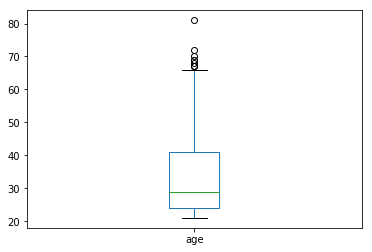

In [6]:
#### Boxplot
from matplotlib import pyplot
from pandas import read_csv

data.age.plot(kind='box', sharex=False, sharey=False)
pyplot.show()

#### e) Distribution des classes (cas de classification)

In [43]:
from pandas import read_csv
filename = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
class_counts = data.groupby('class').size()
print(class_counts)

In [52]:
data.groupby("class").size() #### Groupe par modalité de la variable class et compter l'ensemble des individus

#### Variable qualitative

class
0    500
1    268
dtype: int64

#### f) Corrélation entre les variables

In [53]:
from pandas import read_csv
from pandas import set_option
filename = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
set_option('display.width', 100)
set_option('precision', 3)
correlations = data.corr(method='pearson') #### Corrélation des variables (quantitatives)
print(correlations) #### matrice de corrélation

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


#### g) Asymétrie de distribution univariée

In [10]:
from pandas import read_csv
filename = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
skew = data.skew()
print(skew)

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64


#### h) A retenir

**Remettez en question les chiffres**. Générer des chiffres n'est pas suffisant, il faut s'intérogger sur leur cohérence.
* Y-a t-il des valeurs abhérentes? 
* Les valeurs correspondent-elles à ce qu'on en attend ?

<img src = "https://cdn-images-1.medium.com/max/1200/0*NHW_bXs9Oxaec7eo.png" width = "300">


## IV - Comprendre les données à l'aide de la visualisation

#### a) Affichage univarié

#### Histogramme

In [54]:
from matplotlib import pyplot
from pandas import read_csv
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)


In [4]:
data.iloc[:,6].dtypes

dtype('float64')

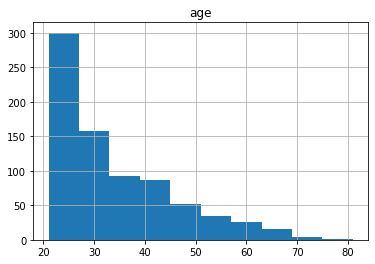

In [58]:
data[["age"]].hist()

pyplot.show()

#### Density

In [59]:
from matplotlib import pyplot
from pandas import read_csv
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']


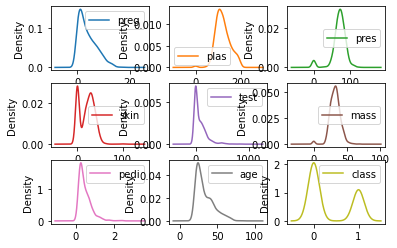

In [60]:
data = read_csv(filename, names=names)
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

#### BoxPlot

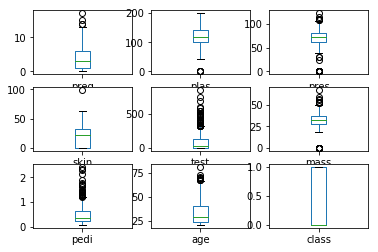

In [18]:
from matplotlib import pyplot
from pandas import read_csv
filename = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

#### b) Affichage multivariée

#### Matrice de corrélation

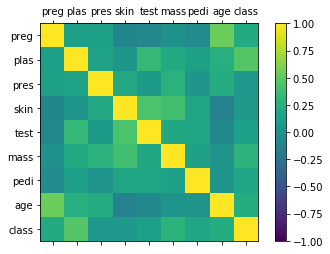

In [19]:
from matplotlib import pyplot
from pandas import read_csv
import numpy
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()


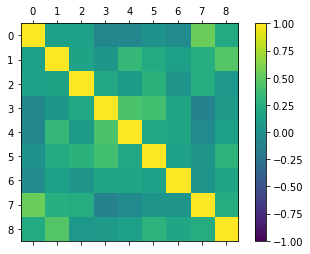

In [20]:
from matplotlib import pyplot
from pandas import read_csv
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

#### Scatterplot

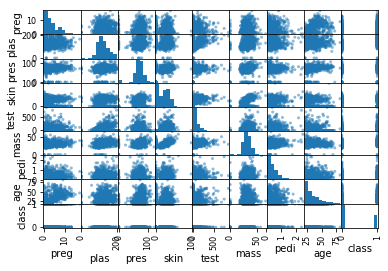

In [21]:
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
filename = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
scatter_matrix(data)
pyplot.show()

## V - Recoder les données 

In [72]:
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [86]:
data["age_class"] = pd.cut(data.age, 5) #### Nouvel outils: quantitative - > qualitative 

In [85]:
data

,preg,plas,pres,skin,test,mass,pedi,age,class,age_class
0,6,148,72,35,0,33.6,0.627,50,1,"(45.0, 57.0]"
1,1,85,66,29,0,26.6,0.351,31,0,"(20.94, 33.0]"
2,8,183,64,0,0,23.3,0.672,32,1,"(20.94, 33.0]"
3,1,89,66,23,94,28.1,0.167,21,0,"(20.94, 33.0]"
4,0,137,40,35,168,43.1,2.288,33,1,"(20.94, 33.0]"
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,"(57.0, 69.0]"
764,2,122,70,27,0,36.8,0.340,27,0,"(20.94, 33.0]"
765,5,121,72,23,112,26.2,0.245,30,0,"(20.94, 33.0]"
766,1,126,60,0,0,30.1,0.349,47,1,"(45.0, 57.0]"


In [81]:
data.dtypes

preg            int64
plas            int64
pres            int64
skin            int64
test            int64
mass          float64
pedi          float64
age             int64
class           int64
age_class    category
dtype: object

a) Binariser les données

In [61]:
# from sklearn.preprocessing import Binarizer
# from pandas import read_csv
# from numpy import set_printoptions
# filename = 'pima-indians-diabetes.data.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = read_csv(filename, names=names)
# array = dataframe.values

In [63]:
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [82]:
# X = array[:,0:8]
# Y = array[:,8]

# #### Binariser les données sur le seuil 0.0
# binarizer = Binarizer(threshold=0.0).fit(X)
# binaryX = binarizer.transform(X)

# set_printoptions(precision=3)
# print(binaryX[0:5,:])

In [66]:
# X = array[:,0:8]
# Y = array[:,8]

In [83]:
# #### Binariser les données sur le seuil 0.0
# binarizer = Binarizer(threshold=0.5).fit(X)
# binaryX = binarizer.transform(X)
# binaryX

In [ ]:

# set_printoptions(precision=3)
# print(binaryX[0:5,:])

In [87]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                   'C': [1, 2, 3]})

In [88]:
df

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [90]:
#### Qualitatives --> Quantitatives (ML)

In [89]:
pd.get_dummies(df, prefix=['col1', 'col2']) #### Transforme les chaines de caractères en nombre pour ML

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


## VI - Modélisation statistique (Cas de la régression linéaire)